# ***Regression on diamonds price***

Diamonds are precious stones consisting of a clear and colourless crystalline form of pure carbon. They are the hardest gemstones known to man and can be scratched only by other diamonds.

Diamonds are formed deep within the Earth about 100 miles or so below the surface in the upper mantle. Obviously, the temperature of this part of the Earth is very high. Plus, there is a lot of pressure, the weight of the overlying rock bearing down. The combination of high temperature and high pressure is what’s necessary to grow diamond crystals in the Earth.

Diamonds are rare because of the incredibly powerful forces needed to create them and therefore they are considered to be very costly.

The goal of this project is to do a regression on diamond prices. To do that we will present the dataset we will use, and then present the methods used and their results.

## *Required librairies*

- NumPy
- Pandas
- Scikit-learn
- Matplotlib
- Seaborn

> ## *Importations*





In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Splitting the data 
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import normalize

>## *Loading up the data*

In [14]:
df = pd.read_csv('data/diamond.csv')
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


* Carat Weight: in grams

* Cut: how good the cut is

* Color: the color of the diamond

* Clarity: diamond clarity rating

* Polish: diamond polish rating

* Symmetry: diamond symmetry rating

* Report: which company has graded the diamond

* Price: in US dollars

We have qualitative features (categorical) such as Cut, Color, Clarity, Polish, Symmetry and Report; and some quantitative features (numerical) such as Carat Weight and Price. The target variable is Price.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [16]:
# Descritpive analysis of the dataset (only applies on numerical values)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat Weight,6000.0,1.334520,0.475696,0.75,1.0,1.13,1.59,2.91
Price,6000.0,11791.579333,10184.350051,2184.00,5150.5,7857.00,15036.50,101561.00


In [17]:
# Missing data
print(df.isna().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [18]:
# Unique object values of our columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(col,": ",df[col].unique())

Cut :  ['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
Color :  ['H' 'E' 'G' 'D' 'F' 'I']
Clarity :  ['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
Polish :  ['VG' 'ID' 'EX' 'G']
Symmetry :  ['EX' 'ID' 'VG' 'G']
Report :  ['GIA' 'AGSL']


We have no missing data, we can process to our dataset visualization.

>## *Dataset visualzation*

We are going to use visualization to spot outliers and errors if there are any.

>>### Carat Weight

A carat corresponds to a weight of 0.2 grams in jewellery-making.

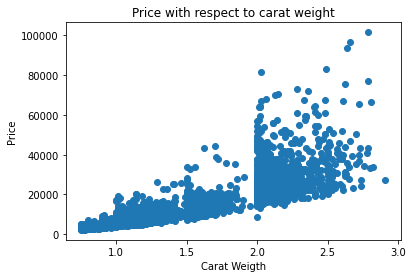

In [19]:
plt.scatter(x=df['Carat Weight'], y=df['Price'])
plt.title('Price with respect to carat weight')
plt.xlabel('Carat Weigth')
plt.ylabel('Price')
plt.show()

We see carat weight as an impact on the price of the diamond.

The heavier the diamond, the more expensive it is. 

>>### Cut

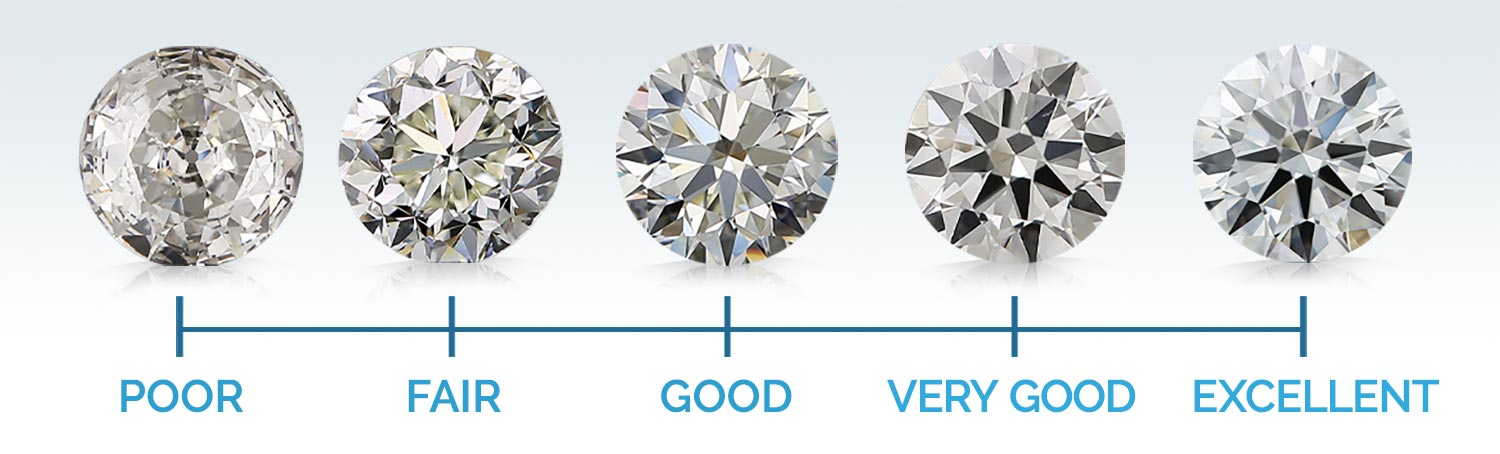

In [20]:
# See which ratings are present in our dataset
print('Cut: ',df['Cut'].unique())

Cut:  ['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']


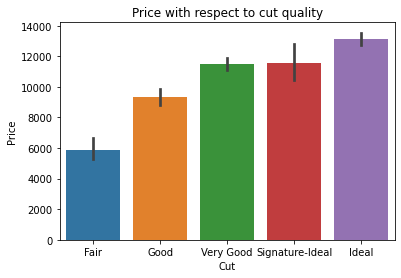

In [21]:
order = ['Fair', 'Good', 'Very Good', 'Signature-Ideal', 'Ideal']

sns.barplot(data=df, x='Cut', y='Price', order=order)
plt.title('Price with respect to cut quality')
plt.show()

The cut also matters, the more ideal the cut, the more expensive the diamond is.

>>### Clarity

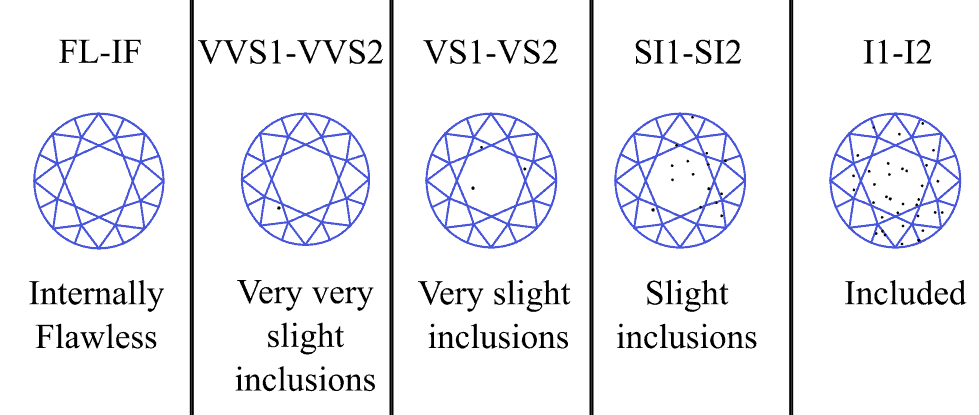

In [22]:
# See which ratings are present in our dataset
print('Clarity: ',df['Clarity'].unique())

Clarity:  ['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']


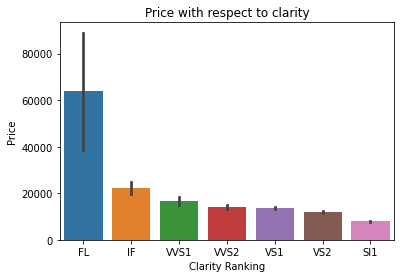

In [23]:
# Creating an decreasing order to concur with the image
order = df['Clarity'].value_counts().index[::-1]

sns.barplot(x='Clarity', y='Price', data=df, order=order)
plt.title('Price with respect to clarity')
plt.xlabel('Clarity Ranking')
plt.show()

The clearer the diamond, the more expensive it is.

>>### Color

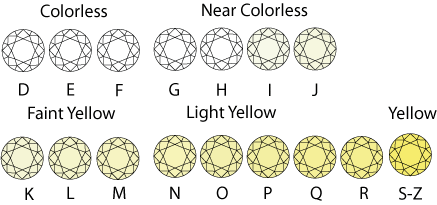

In [24]:
# See which ratings are present in our dataset
print('Color: ',df['Color'].unique())

Color:  ['H' 'E' 'G' 'D' 'F' 'I']


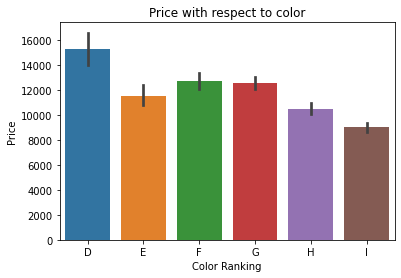

In [25]:
order = sorted(df['Color'].unique().tolist())

sns.barplot(data=df, x='Color', y='Price', order=order)
plt.title('Price with respect to color')
plt.xlabel('Color Ranking')
plt.show()

We see that color matters as a transparent diamond has a higher price than colored one.

>>### Symmetry

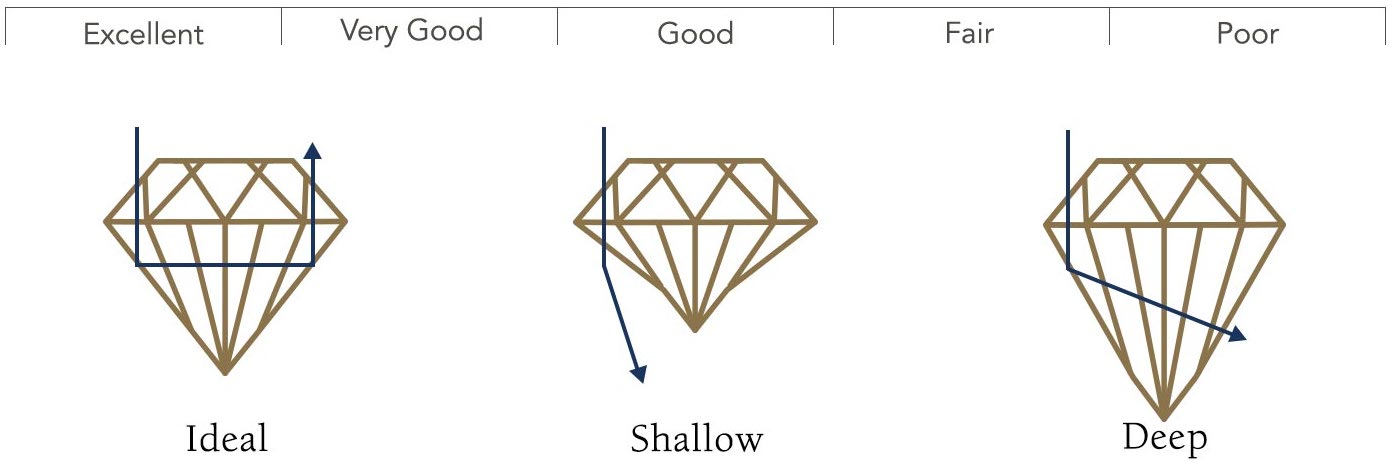

In [26]:
# See which ratings are present in our dataset
print('Symmetry: ',df['Symmetry'].unique())

Symmetry:  ['EX' 'ID' 'VG' 'G']


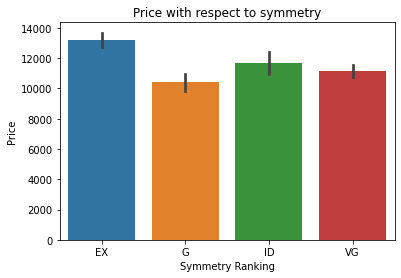

In [27]:
order = sorted(df['Symmetry'].unique().tolist())

sns.barplot(data=df, x='Symmetry', y='Price', order=order)
plt.title('Price with respect to symmetry')
plt.xlabel('Symmetry Ranking')
plt.show()

We also see that the more perfect the symmetry is, the more expensive the diamond.

>> ### Polish

In [28]:
print('Polish:', df['Polish'].unique())

Polish: ['VG' 'ID' 'EX' 'G']


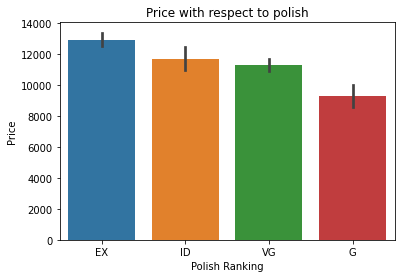

In [29]:
order = ['EX', 'ID', 'VG', 'G']
sns.barplot(data=df, x='Polish', y='Price', order=order)
plt.title('Price with respect to polish')
plt.xlabel('Polish Ranking')
plt.show()

>>### Pie charts

<Figure size 720x720 with 0 Axes>

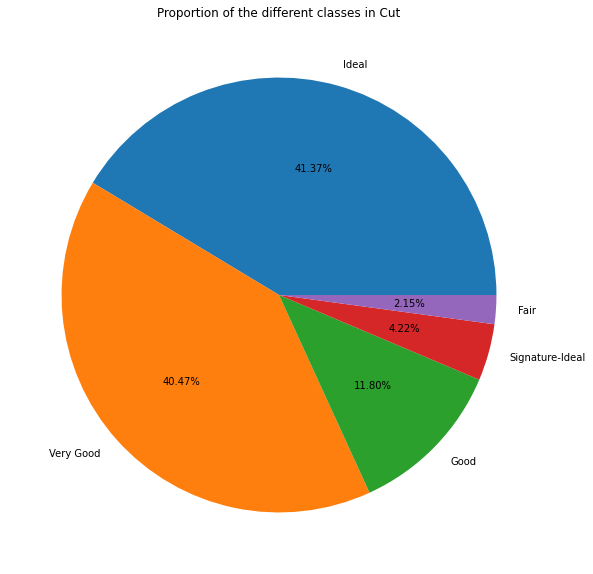

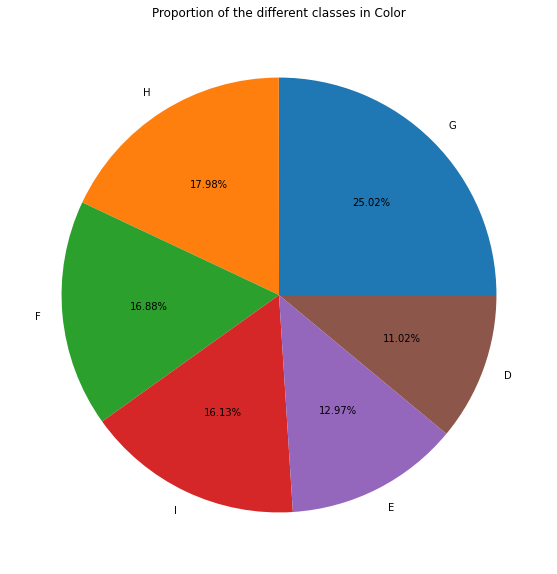

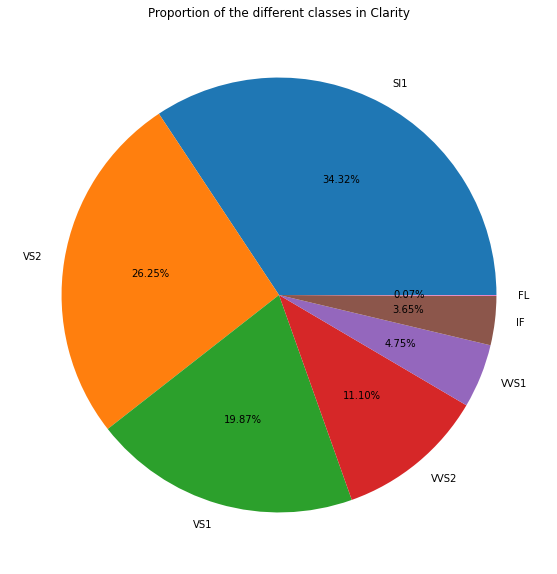

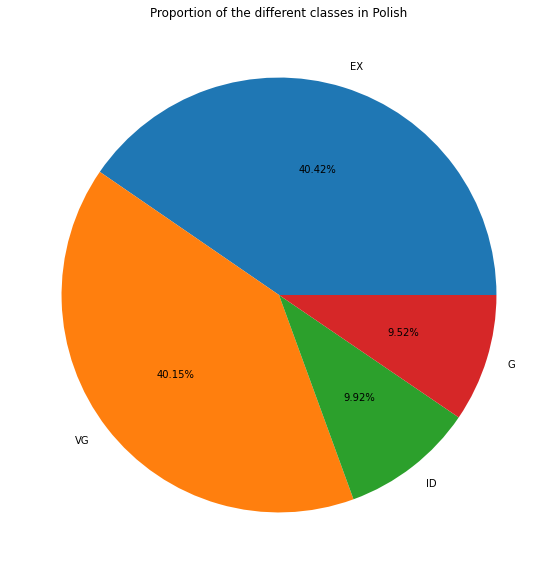

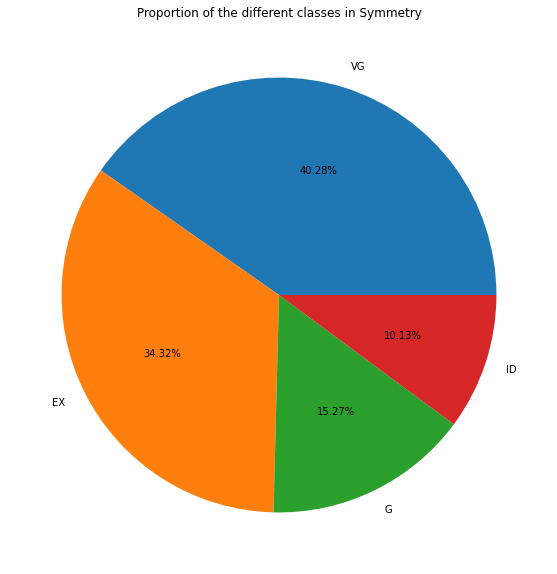

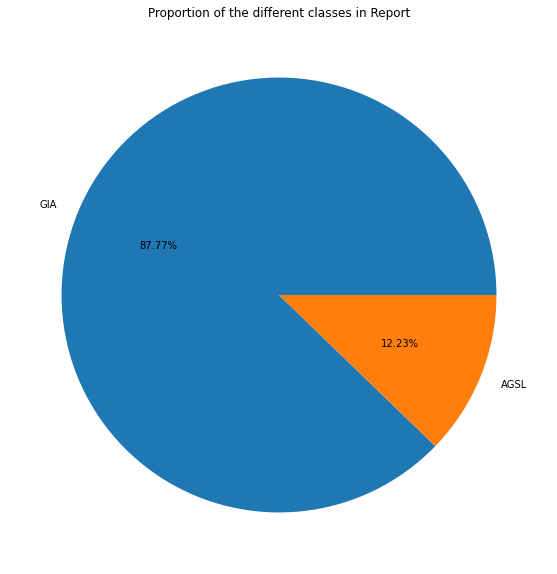

<Figure size 720x720 with 0 Axes>

In [30]:
for col in df.columns:
    plt.figure(figsize=(10, 10))
    if df[col].dtype == 'object':
        ax = plt.pie(x=df[col].value_counts(),labels=df[col].value_counts().index, autopct='%.2f%%')
        plt.title("Proportion of the different classes in {}".format(col))
        plt.show()

We have not spotted anything weird or unusual in the data and we checked for null values before, so we can assume the data is ready for manipulation.

>## *Preprocessing*

First, we need to convert our ordinal values columns into numerical values. For this task, we are going to use a label encoder to convert categorical data into numerical one, and a scaler to scale data.

In [72]:
# First make a copy of the data, to be sure not to overwrite anything
df_copie = df.copy()

In [73]:
df_copie.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [74]:
data = df_copie.iloc[1629]
print(data)

Carat Weight     1.01
Cut             Ideal
Color               G
Clarity           VS2
Polish             VG
Symmetry           EX
Report            GIA
Price            6449
Name: 1629, dtype: object


In [75]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df_copie.columns:
    if df_copie[col].dtype == 'object':
        enc.fit(df_copie[col])
        #print(col)
        #print(list(enc.classes_))
        df_copie[col] = enc.transform(df_copie[col])

In [76]:
df_copie.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171


To preporcess one array, ie a new diamond:

In [77]:
data = df_copie.iloc[1629]
print(data)

Carat Weight       1.01
Cut                2.00
Color              3.00
Clarity            4.00
Polish             3.00
Symmetry           0.00
Report             1.00
Price           6449.00
Name: 1629, dtype: float64


>>### Data splitting


In [58]:
X = df_copie.drop(['Price'], axis=1)
y = df_copie['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=3)

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [59]:
print("X_train shape: {}  y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}  y_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (5100, 7)  y_train shape: (5100,)
X_test shape: (900, 7)  y_test shape: (900,)


> ## *Model selection*


In [40]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV

In [44]:
# A quick model selection process pipelines of models(it is short was to fit and pred)
pipeline_linreg = Pipeline([('linreg_model',LinearRegression())])
pipeline_ridge = Pipeline([('ridge_model',Ridge())])
pipeline_DT = Pipeline([('DT_model',DecisionTreeRegressor())])
pipeline_RF = Pipeline([('RF_model',RandomForestRegressor())])

# List of all the pipelines
pipelines = [pipeline_linreg, pipeline_ridge, pipeline_DT, pipeline_RF]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Ridge', 2: 'Decsison Tree', 3: 'Random Forest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("{}:\t {:.6f}".format(pipe_dict[i], cv_score.mean()))

Linear Regression:	 0.817410
Ridge:	 0.817418
Decsison Tree:	 0.967545
Random Forest:	 0.980453


>>### Best parameters selection

In [45]:
parameters = {
    'n_estimators': [100, 200],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}

CV_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5)
CV_RF.fit(X_train, y_train)

CV_RF.best_params_

{'criterion': 'squared_error', 'n_estimators': 200}

In [86]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9797089534217066